This notebook shows, how to compute RandomForest's accuracy scores for each value of `n_estimators` without retraining the model. No rocket science involved, but still useful.

# Load some data

In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

X, y = sklearn.datasets.load_digits(10,True)
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [2]:
X_train, y_train

(array([[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,   1.,   0.,   0.],
        [  0.,   0.,   3., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   1.,  12., ...,   1.,   0.,   0.],
        [  0.,   0.,   8., ...,   7.,   1.,   0.],
        [  0.,   0.,   4., ...,   2.,   0.,   0.]]),
 array([9, 5, 5, ..., 5, 2, 0]))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Step 1:** first fit a Random Forest to the data. Set `n_estimators` to a high value.

In [4]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Step 2:** Get predictions for each tree in Random Forest separately.

In [5]:
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_val)[None, :])  #get prediction of validation X from each tree

In [8]:
predictions[0:2]

[array([[[ 0.        ,  0.19318182,  0.40909091, ...,  0.        ,
           0.04545455,  0.02272727],
         [ 0.        ,  0.29433962,  0.11320755, ...,  0.01886792,
           0.34716981,  0.06037736],
         [ 0.        ,  0.00757576,  0.0530303 , ...,  0.        ,
           0.        ,  0.        ],
         ..., 
         [ 0.        ,  0.02040816,  0.        , ...,  0.51020408,
           0.16326531,  0.        ],
         [ 0.        ,  0.05194805,  0.        , ...,  0.        ,
           0.        ,  0.12987013],
         [ 0.        ,  0.29433962,  0.11320755, ...,  0.01886792,
           0.34716981,  0.06037736]]]),
 array([[[ 0.02515723,  0.04402516,  0.        , ...,  0.        ,
           0.08176101,  0.        ],
         [ 0.0651341 ,  0.08045977,  0.        , ...,  0.00383142,
           0.04597701,  0.04980843],
         [ 0.0651341 ,  0.08045977,  0.        , ...,  0.00383142,
           0.04597701,  0.04980843],
         ..., 
         [ 0.        ,  0.2    

**Step 3:** Concatenate the predictions to a tensor of size `(number of trees, number of objects, number of classes)`.

In [9]:
predictions = np.vstack(predictions)

In [11]:
predictions[0:2]

array([[[ 0.        ,  0.19318182,  0.40909091, ...,  0.        ,
          0.04545455,  0.02272727],
        [ 0.        ,  0.29433962,  0.11320755, ...,  0.01886792,
          0.34716981,  0.06037736],
        [ 0.        ,  0.00757576,  0.0530303 , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.02040816,  0.        , ...,  0.51020408,
          0.16326531,  0.        ],
        [ 0.        ,  0.05194805,  0.        , ...,  0.        ,
          0.        ,  0.12987013],
        [ 0.        ,  0.29433962,  0.11320755, ...,  0.01886792,
          0.34716981,  0.06037736]],

       [[ 0.02515723,  0.04402516,  0.        , ...,  0.        ,
          0.08176101,  0.        ],
        [ 0.0651341 ,  0.08045977,  0.        , ...,  0.00383142,
          0.04597701,  0.04980843],
        [ 0.0651341 ,  0.08045977,  0.        , ...,  0.00383142,
          0.04597701,  0.04980843],
        ..., 
        [ 0.        ,  0.2       ,  0.01578947, ...,

**Step 4:** Сompute cumulative average of the predictions. That will be a tensor, that will contain predictions of the random forests for each `n_estimators`.

In [12]:
# average of per prediction from different trees
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]

**Step 5:** Get accuracy scores for each `n_estimators` value

In [13]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_val, np.argmax(pred, axis=1)))

**That is it!** Plot the resulting scores to obtain similar plot to one that appeared on the slides.

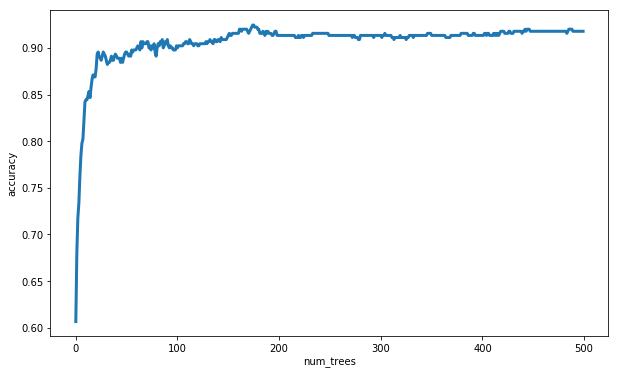

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');

We see, that 150 trees are already sufficient to have stable result.